In [37]:
import xmltodict
import json
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
import math
from collections import defaultdict


## Reading Posts file

In [19]:
lines = []
with open('./amul/Posts.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df = pd.DataFrame(lines)
df.head()

Id PostTypeId AcceptedAnswerId             CreationDate Score ViewCount  \
0   594          1              595  2008-08-03T01:15:08.507    44     48444   
1   802          2              NaN  2008-08-03T20:07:05.290     6       NaN   
2  1852          2              NaN  2008-08-05T03:11:55.570     9       NaN   
3  2937          2              NaN  2008-08-05T22:34:25.397   277       NaN   
4  3117          2              NaN  2008-08-06T06:00:28.740   118       NaN   

                                                Body OwnerUserId  \
0  <p>There are several ways to iterate over a re...         116   
1  <p>I uploaded it and got an internal error</p>...     1384652   
2  <p><strong>On Windows:</strong></p>\n\n<pre><c...         116   
3  <p>First you will need some GUI library with P...         275   
4  <p>I've had to work with several beginner (nev...         100   

  LastEditorUserId LastEditorDisplayName  ...         LastActivityDate  \
0              116         Mark Harrison  ...  2016-10-15T20:47:11.027   
1          1384652               Teifion  ...  2008-08-04T21:46:00.797   
2              116         Mark Harrison  ...  2008-08-27T00:09:22.413   
3          1839209           lubos hasko  ...  2018-09-20T16:37:27.707   
4            35070            superjoe30  ...  2009-04-07T13:34:20.257   

                                            Title  \
0  cx_Oracle: How do I iterate over a result set?   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

                                         Tags AnswerCount CommentCount  \
0  <python><sql><database><oracle><cx-oracle>           3            1   
1                                         NaN         NaN            0   
2                                         NaN         NaN            0   
3                                         NaN         NaN            6   
4                                         NaN         NaN            3   

  FavoriteCount ParentId       CommunityOwnedDate OwnerDisplayName ClosedDate  
0            10      NaN                      NaN              NaN        NaN  
1           NaN      766                      NaN              NaN        NaN  
2           NaN     1829                      NaN              NaN        NaN  
3           NaN     2933  2008-09-11T08:52:20.330              NaN        NaN  
4           NaN     3088  2008-09-19T11:43:53.757              NaN        NaN  

[5 rows x 21 columns]

A sample tag in dataframe.

In [69]:
df['Tags'][0]

'<python><sql><database><oracle><cx-oracle>'

In [70]:
tags_arr = df['Tags']

## Common Sampling for Posts is done through python tag

In [72]:
for tag in tags_arr:
    if type(tag) != str:
        continue
    print(tag)

<python><sql><database><oracle><cx-oracle>
<python><ruby><semantics><zemanta>
<python><user-interface><drag-and-drop><wxpython><wxwidgets>
<python><ssh>
<python><linux><unix><process>
<python><executable><environment><shebang>
<python><dvcs><bazaar>
<python><exe><executable>
<java><python>
<python><arrays>
<python><regex><caching>
<python><ssh><automation><scp>
<python><email><sendmail>
<python><ide><editor>
<python><shell><terminal><subprocess><command>
<c#><python><perl><ide><scintilla>
<python><windows>
<python><c><ironpython><jython><ironclad>
<python><web-services><google-app-engine><authentication>
<python><multithreading><thread-local>
<python><testing>
<python><qt><gtk><desktop>
<python><packaging><py2exe>
<python><windows><logging>
<python><web-services><soap>
<python><split><escaping><quotes>
<python><urllib2><user-agent><wikipedia><http-status-code-403>
<python>
<python><crud><turbogears>
<python><pylons>
<python><user-interface><events><tkinter>
<python><string><file><strin

<python><string><immutability>
<python>
<python><django><google-app-engine>
<python><forms><mechanize>
<python><linux><ubuntu>
<python><time><networking><system>
<python><python-idle>
<python><gtk><pygtk>
<python>
<python><sql><orm><python-elixir>
<python><list-comprehension>
<python><django><generics>
<python><tkinter>
<python><ruby><module>
<python>
<python><ssh><python-3.x><paramiko>
<python><regex>
<python><django><django-models>
<python><google-app-engine>
<python><authentication><authorization><polling><web.py>
<python><sql><sql-server><django><encryption>
<python><import>
<python><google-app-engine><django-templates>
<python><django>
<c#><c++><python><mono><meep>
<python><django><templates><include><extend>
<python><arduino>
<python><data-structures><tree>
<python><file><csv>
<python><list><max>
<python><multithreading><sockets>
<python><regex>
<python><unicode><encoding><unicode-string>
<python><ssh><easy-install>
<python><google-app-engine><google-cloud-datastore>
<python><ubu

<python><pygame>
<python><arrays><numpy><multidimensional-array>
<python><windows><lxml>
<python><webkit><flask><hybrid>
<python><list>
<python><file-io><buffer>
<python><matplotlib>
<python><sorting><dictionary>
<python><coding-style>
<python><scrapy>
<python><locking><celery>
<python><numpy><scipy><sparse-matrix><linear-equation>
<python><regex>
<python><list><sorting><unique><python-2.2>
<python><django><mod-wsgi><python-requests><django-wsgi>
<python><http><mechanize><mechanize-python>
<python><multithreading><signals>
<javascript><python><screen-scraping>
<python><twitter><input><stdin><tweepy>
<python><parsing><dictionary><arguments>
<python>
<python><debugging><mfc><ide><embedding>
<python><qr-code>
<python><backend><web.py>
<python><opencv><hough-transform>
<python><multithreading>
<python><nosetests>
<python><google-app-engine><memory-leaks><gql>
<python><list><sum><max>
<python><http><utf-8>
<python><macos><smtp><postfix-mta>
<python><json><exception>
<python><qt4><automation

<python><google-app-engine>
<python><igraph>
<python><mysql><django>
<python><unit-testing><celery>
<python><callback><signals><decorator>
<python><python-2.7>
<python><sql><transactional>
<python><django><csv><sqlite>
<python><django><mixins><django-class-based-views>
<python><list>
<python><tor>
<python><tkinter><sticky>
<python><regex>
<python><dictionary><iterable-unpacking><dictionary-comprehension>
<python><algorithm><primes><itertools><sieve-of-eratosthenes>
<python><unit-testing><tdd>
<python><google-app-engine>
<python><nameerror>
<python><django><unit-testing>
<python><text><io><python-2.7><overwrite>
<python><qt><printing><pyside><qtableview>
<python><linkedin><socialauth>
<python><django><tastypie>
<python><pyqt4><data-visualization><graphviz>
<python><django>
<python><python-3.x>
<python><database><postgresql><psycopg2>
<python><redis><celery>
<python><wxpython>
<python><random><numbers>
<python><traits>
<python><csv>
<python><virtualenv><homebrew><mac-frameworks>
<python>

<python><function><dictionary><tuples>
<python><google-app-engine><gae-sessions>
<python><deployment><module>
<python><garbage-collection><generator><coroutine>
<python><xml><module><openerp>
<python><loops><while-loop>
<python><shortcut><win32com>
<python><emacs><restructuredtext>
<python>
<python><pyqt><pyside>
<python><linux><openerp>
<python><xml><elementtree>
<python><list><tuples>
<python><list><multidimensional-array><outofrangeexception>
<python><linux><bash>
<python><dynamics-crm-2011>
<python><travis-ci>
<python><numpy><binary>
<python><mysql><database-connection>
<python><prime-factoring>
<python><task><powerpoint><scheduler><win32com>
<python><numpy>
<python><macos><vim><xdebug>
<python><lambda>
<python><file><text><count>
<python>
<python><bash><file><sockets><tcp>
<python><twisted>
<python><wxpython>
<python><python-2.6>
<python><decode>
<python>
<python><loops><pyqt><pyside>
<python><scikit-learn><linear-regression>
<python><tkinter>
<python><logging><module>
<python><sc

<python><class><pygame>
<python><gtk><pygtk>
<python><firefox><csv><selenium><webdriver>
<python><file><parsing><file-io>
<python><python-3.x><paramiko>
<python><hash><cross-platform>
<python><if-statement><bots><skype><statements>
<python><numpy><regression><curve-fitting><data-fitting>
<python><django><wizard>
<python><matplotlib><plot><dimension>
<python><imaging>
<python><list><for-loop><product>
<python><regex>
<python><list><append>
<python><list>
<python><csv>
<jquery><python><django><file-upload><amazon-s3>
<python><networking><tasklist>
<python><regex><scrapy><regex-negation>
<python><python-3.x><decimal><floating-point-precision>
<python><django><sqlite><django-south>
<python><multithreading>
<python><google-app-engine><boto><google-cloud-storage><google-compute-engine>
<python><regex>
<python><function><return>
<python><matplotlib><plot>
<python><numpy>
<python><logging><jupyter-notebook><jupyter>
<python>
<python><import><qstk>
<python><csv><sum>
<python><image><tkinter><la

<python><python-2.7>
<python><django><ckeditor><django-staticfiles><django-ckeditor>
<python><select><scripting><geometry><maya>
<python><python-2.7><python-3.x><pygame>
<python><import><twisted><pyserial>
<python><qt><plot><pyqt><qwt>
<python><list><tuples><list-comprehension>
<python><c><execution>
<python><xml><xpath><lxml>
<python>
<python><html><beautifulsoup>
<python><while-loop>
<python><list><if-statement><dictionary>
<python><linux><file>
<python><sockets>
<python>
<python><encryption><aes><pycrypto>
<python><algorithm><big-o>
<python><winapi><printing><wxpython>
<python><eclipse><python-2.7><ubuntu>
<python><windows><shutil>
<python><select><xhtml><scrapy>
<python><printing>
<python>
<python><list><numpy>
<python><json>
<python><pygame>
<python><django><url>
<python><matplotlib>
<python><pandas>
<python><google-app-engine><python-multithreading><concurrent-programming>
<python><debugging><python-2.7>
<java><android><python><monkeyrunner>
<python><regex><unicode><python-unicod

<python><ubuntu><import><scikit-learn><libraries>
<python><python-2.7>
<python><django><api><rest><django-rest-framework>
<python><dictionary><merge>
<python><numpy>
<python><csv><import><casting><pandas>
<python><perl><soap><soappy><soaplite>
<python><list>
<python><matplotlib>
<python><filenames><rename>
<python><web-scraping>
<python><sqlite>
<python><mysql><python-3.x><pip><python-module>
<python><recursion><printing><return>
<python><variables><tkinter><tk>
<python>
<python><numpy><matplotlib><plot>
<python><apache><hadoop><mapreduce>
<python><redis>
<python><join><merge><pandas>
<python><json><pandas>
<python><python-2.7>
<python><dictionary><curses>
<python><scikit-learn><regression>
<python><c++>
<python><simplecv>
<python><python-2.6><python-unittest>
<python><regex><linux><python-2.7><sed>
<javascript><jquery><python><html>
<python><rest><flask><flask-restful>
<python><django><dajaxice><dajax>
<python><c><ctypes>
<python><logging>
<python><json>
<python><numpy><scipy><gaussia

<python><networking><ip><ipv4><cidr>
<python>
<python>
<python><mocking>
<python><sympy>
<python><function><class><reference><path-finding>
<python><scrapy>
<python><list><tuples>
<python><sql-server><macos><pyodbc><unixodbc>
<python><csv><web-scraping>
<python><64-bit><32bit-64bit><py2exe><32-bit>
<python><main>
<python><list><dictionary><syntax>
<python><matplotlib><scatter-plot>
<python><list>
<python><syntax-error><runtime-error>
<python><variables><text><floating-point><numbers>
<python><scrapy>
<python><search><find><arguments>
<python><youtube-dl>
<python><performance><optimization><dictionary>
<python><python-2.7><raspberry-pi><pyro>
<python><string><list>
<python><string-formatting>
<python><gtk><gtk3>
<python><multithreading><function><python-2.7><user-defined-functions>
<python>
<python><gaussian><least-squares><divide-by-zero>
<python><django>
<python><python-requests>
<python><opencv>
<python><rabbitmq><celery>
<python><uuid>
<python><sockets><udp>
<python><django><nginx><

<python><string><integer><ordinal>
<python><sql><database><email>
<python><selenium>
<python><file><csv><indexing><plot>
<python><arrays><numpy>
<python><python-3.x>
<python><html><django>
<python><json><mongodb>
<python><jinja2><template-engine><mako>
<python><twitter-oauth>
<python><function><loops><while-loop><python-3.3>
<python>
<python>
<python><django><views><middleware>
<python><numpy><file-format><nifti>
<python><mysql><dictionary>
<python><inheritance><python-3.x>
<python><python-3.x><dictionary>
<python><numpy>
<python>
<python><recursion><tree><nlp>
<python><bokeh>
<python><python-2.7>
<python><python-2.7><openerp><openerp-7><odoo>
<python><mysql><django><caching>
<python><python-2.7><pandas><zip>
<python><django>
<python><plot><gaussian>
<python><average>
<python><machine-learning><scikit-learn><cluster-analysis><k-means>
<python>
<python><python-2.7><numpy><matrix>
<python><multithreading><queue>
<python><numpy><graph>
<python><logging>
<python><apache><mod-wsgi><wsgi><tr

<python>
<python><syntax><lambda>
<python><django><database><string-formatting>
<python><c++><boost><cmake>
<python><list>
<python><linux><io>
<python><python-2.7>
<python><csv><importerror>
<python><unicode><fastq>
<python><regex>
<python><csv>
<python><file><python-textprocessing>
<python><cryptography><hmac><pycrypto><sha512>
<python><sqlite><python-2.7>
<python><networkx><shapes>
<python><web-scraping><scrapy>
<python><django><django-models>
<python><loops><if-statement><for-loop><while-loop>
<python><arrays><image><numpy><reshape>
<python><missing-data><crf><missing-features>
<python><api>
<python><html><parsing>
<python><batch-file><networking><qgis>
<python><arrays><numpy><minimum><netcdf>
<python><json>
<python><django><postgresql>
<python><hash>
<python><openerp><odoo-8>
<python>
<python><sqlite><flask><sqlalchemy><pycharm>
<python><lambda><defaultdict>
<python><subprocess><interpreter>
<python><json><django><elasticsearch><django-haystack>
<python><file-copying>
<python><sqla

<python><travis-ci><nose><tox>
<python><wxpython>
<python><ftp><ftplib>
<python><django><django-queryset>
<python>
<python><django>
<python><python-3.x>
<python><python-3.x>
<python><unit-testing><pytest>
<python><django><django-users>
<python><python-2.7><python-3.x>
<python><tkinter><edges>
<python>
<python><algorithm><shell><awk>
<python><pandas><numpy><matplotlib><data-visualization>
<python><python-2.7><sockets><python-sockets>
<python><python-2.7><beautifulsoup><screen-scraping>
<python><linux><raspberry-pi><interrupt><interrupt-handling>
<python><django>
<python><pdf>
<python><types>
<python><python-2.7><url><wikipedia>
<python>
<python><matplotlib>
<python><wxpython><pyinstaller>
<python><combobox><autocomplete><tkinter><listbox>
<python><html><ffmpeg><video.js><transcoding>
<python><pyparsing>
<python><django>
<python><regex>
<python><matplotlib>
<python><python-requests>
<python><django><django-allauth>
<python><matrix><sympy><polynomials>
<python><django><django-queryset>
<p

<python><python-import>
<python><curl><flask><sqlalchemy>
<python><arrays><list>
<python><arrays>
<python><flask><flask-restful>
<python><curl><sublimetext3><sublime-text-plugin><pycurl>
<python><flask><seaborn>
<python><python-3.x><dictionary><iterator><generator>
<python><redis>
<python><django><authentication><tastypie>
<python><opencl><pyopencl>
<python><bit-manipulation><bit>
<python><list><sorting><quicksort>
<python><dictionary><ordereddictionary>
<python><properties><inspect>
<python><cmd><tkinter><execute>
<python><firefox><selenium><xpath><web-scraping>
<python><tkinter><wxpython><messagebox>
<python><web-scraping><scrapy>
<python><authentication><python-requests><restful-authentication>
<python><dialog><wxpython><listener>
<python><arrays><mapping><points>
<python><curl><python-requests>
<python><loops><if-statement>
<python><matplotlib><wxpython><blit>
<python><dictionary>
<python><django><django-templates><jinja2>
<python><gis><gdal><shapely><fiona>
<python><flask><sqlalch

<python><algorithm><math>
<python><mysql><raspberry-pi>
<python><numpy>
<python><arrays><numpy><image-processing><reshape>
<python><regex><data-cleaning>
<python><list><multiprocessing>
<python>
<python><arrays><numpy><matrix><indexing>
<python>
<python><celery>
<python><xlrd>
<python><dependencies><buildout>
<python><fibonacci>
<python>
<python><nginx><uwsgi>
<python><python-2.7>
<python><selenium><dynamic-tables>
<python><django><django-rest-framework><django-rest-auth>
<python><sqlalchemy><python-decorators>
<python><function><user-interface><wxpython>
<python><python-2.7><heap>
<python><elasticsearch>
<python><argparse>
<python><c++><python-2.7><error-handling><gdal>
<python><text-files>
<python><matplotlib><plot>
<python><intellij-idea><markdown><pycharm><jupyter>
<python><networkx>
<python><json><django>
<python><regex>
<python>
<python><list><join><path><operating-system>
<python><arrays><list><slice>
<python><grep><subprocess><wildcard>
<python><google-chrome><http><post><web-s

<python><selenium><scrapy><web-crawler>
<python><mysql><pandas><sqlalchemy>
<python>
<python><plotly>
<python><flask>
<php><python>
<python><anaconda><python-venv>
<python><pandas><dataframe>
<python><c><matlab><visual-studio>
<python><embed><plotly>
<python><linux><service><systemd>
<python><xml>
<python><django>
<python><django><django-rest-framework>
<python><google-app-engine><task-queue>
<python><qpython>
<python><csv>
<javascript><python><django><excel><python-2.7>
<python><parallel-processing><mpi4py>
<python>
<python><django><upgrade><typeerror>
<python><json><csv>
<python><database><sqlalchemy>
<python><class><matplotlib><plot>
<python><node.js><opencv><ffmpeg><h.264>
<python><subprocess><locale>
<python><list>
<python><django><floating-point><decimal><latitude-longitude>
<python><sonos>
<python><http><cookies><request>
<python><numpy><matrix>
<python><python-decorators>
<python><selenium>
<python>
<python><anaconda><conda>
<python><powershell>
<python><string><generator>
<pyt

<python><pandas><categorical-data>
<python><list><int><arguments><multiplication>
<python><python-3.x>
<python><ftplib><ftps>
<python><sqlite><datetime><sqlalchemy>
<python><pandas>
<python><flask><jinja2>
<python><json><python-2.7><pandas><dictionary>
<python>
<python><machine-learning><nlp><neural-network>
<python><numpy><least-squares><trilateration><lmfit>
<python><function><python-3.x><syntax><python-3.4>
<python><pandas><dataframe><ipython><slice>
<python><xml><netbeans><odoo-8>
<python><django>
<python><twisted><reactor><twisted.internet><sigterm>
<jquery><python><django><datetimepicker>
<python><django><celery><django-celery>
<python><python-3.5>
<python><exception>
<python><django><postgresql>
<python>
<python><selenium>
<python><pip><virtualenvwrapper>
<python><django><forms><validation>
<python><django><django-admin><django-queryset>
<python><installation><tensorflow><anaconda>
<python><if-statement><while-loop><break>
<python><python-3.x><sqlalchemy>
<python><numpy>
<python

<python><go><byte-shifting>
<python><dictionary><text-files>
<python><queue><radix-sort>
<python><django><python-3.x><pycharm>
<python><html>
<python><matplotlib><plot>
<python><python-2.7><serial-port><fpga><pyserial>
<python><linux><windows><wxpython><wxwidgets>
<python><windows><python-2.7><pip><pyhook>
<python><string><python-3.x><variables>
<python><pandas><numpy><matplotlib>
<python><numpy><indexing><substring><where>
<python><function><argparse>
<python><python-3.x><opencv><hsv>
<python><numpy><machine-learning><tensorflow><data-science>
<python><python-3.x><numbers><counter><adventure>
<python>
<python><pandas>
<python><list><python-3.x><for-loop><text-files>
<python><arrays><numpy>
<python><image-processing>
<python>
<python><json><dictionary>
<python><regex>
<python><python-idle>
<python><python-3.x><matplotlib>
<python><python-3.x>
<python><numpy><dataframe><datashader>
<python><pandas><dictionary><dataframe>
<python><json><dictionary>
<python><multithreading>
<python><math>

<python><xpath><lxml>
<python><constructor><default-value>
<python><json><django><jwt><postman>
<python><arrays><storage><analysis>
<python><contour><netcdf><netcdf4>
<python><if-statement><recursion>
<python><c++><macos><jupyter><cling>
<python><python-3.x><scintilla><qscintilla>
<python><openerp>
<python><import-from-excel>
<python><matplotlib><matplotlib-basemap><mplot3d>
<python><dictionary><split><pattern-matching><tuples>
<python><tensorflow>
<python><python-3.x>
<python><jupyter-notebook><moviepy>
<python><python-3.x>
<python><kivy>
<python><matplotlib><legend><scatter>
<python><httpie>
<python><dataframe><conditional><min><absolute>
<python><pygame><mouse><move><rect>
<python><python-2.7>
<python><python-3.x><fractals><zelle-graphics>
<python><django><django-views><celery>
<python><pandas><optimization><dataframe><time-series>
<python><list>
<python><pandas><numpy><dataframe>
<python><object><methods><properties>
<java><python><memory-leaks><classloader><jython>
<python><mongod

<python><json><csv>
<python><pandas><numpy><plot><scatter>
<python><weblogic12c><wlst>
<python><numpy><scikit-learn><slice>
<python><python-3.x><gensim><word2vec>
<python><c++><c><python-2.7>
<python><python-2.7><peewee>
<python><opencv>
<python><python-3.x><django-rest-framework>
<python><c><cython>
<python><loops><pandas><dataframe>
<python><xml><django><jinja2>
<python><opencv><image-processing><computer-vision><augmented-reality>
<python><python-2.7><python-3.x><pyqt4><pyqt5>
<python><regex>
<python>
<python><if-statement><shorthand>
<python><django><django-filter>
<python><networkx><pyzo>
<python><sqlite><sqlalchemy>
<python><pandas><dictionary>
<python><input><screen-scraping><scrape>
<python><linear-programming><pulp>
<python><python-3.x>
<python><python-3.x>
<python><image-processing><scipy><interpolation>
<python><numpy><image-processing><matplotlib><scikit-image>
<python><vector><markov>
<python><django><postgresql><google-cloud-platform>
<python><tkinter>
<python><sorting><d

<python><lambda>
<python>
<python><xml><csv><parsing>
<python><django><authentication>
<python><matplotlib><word-cloud>
<python><python-3.6><libreoffice-calc><pyuno>
<python><python-3.x><opengl><pyglet>
<python><pandas><dataframe>
<python><pandas><scikit-learn><decision-tree><one-hot-encoding>
<python><html><python-3.x><selenium>
<python><unit-testing><mocking><init>
<python><comparison><insertion-sort>
<python><python-3.x><matplotlib>
<python><python-2.7><selenium><web-scraping>
<python><list>
<python>
<python><macos><wine>
<python><recursion><linked-list>
<python><arrays><numpy><image-processing><python-imaging-library>
<python><pandas><pandas-groupby>
<python>
<python><numpy>
<python><sympy><substitution>
<python>
<python>
<python><regex>
<python><opencv><image-processing>
<python><unit-testing><selenium><automation><python-unittest>
<javascript><python><angularjs><flask>
<python><django><facebook><django-rest-framework><django-allauth>
<python><selenium><sendkeys>
<python><c><cmake

<python><google-bigquery>
<python><stdin><eoferror>
<python><pandas><pyspark><hdfs>
<python><button><kivy><textinput>
<python><pandas><matplotlib>
<python><selenium><selenium-webdriver><webdriver>
<python><automation><shutil>
<python><pandas>
<python><pandas><numpy><scipy><kdtree>
<python><pandas><scikit-learn>
<python><django><heroku>
<python><tensorflow>
<python>
<python><python-3.x><pandas><pickle>
<python><multithreading><mod-wsgi><wsgi>
<python><css><django>
<python><pandas>
<python><python-3.x><pandas>
<python><python-3.x><numpy>
<python><scrapy><web-crawler><scrapy-spider>
<python><recursion>
<python><macos><terminal>
<python><python-3.x><tensorflow><object-detection><object-detection-api>
<python><python-3.x><installation><pygame><pip>
<python><numpy><mask>
<javascript><python><django><highcharts><jinja2>
<python><excel><pandas><dataframe><sumifs>
<python><debugging><pycharm>
<python><xml><urllib><opentripplanner>
<python>
<python><django><python-3.x>
<python><django><django-re

<python><python-3.x><blockchain><hashlib>
<python><pandas><google-trends>
<java><python><jython><raspberry-pi3><fingerprint>
<python><gdb><coredump>
<python><python-3.x><list><pandas><counter>
<python><tesseract><python-tesseract>
<python><c++><pointers><boost>
<python>
<python><jira>
<python><pandas><dataframe><indexing><counter>
<python><pandas>
<python><pandas>
<python><jupyter>
<python><kivy>
<python><pandas><dataframe>
<python><arrays><numpy>
<python><list>
<python><parsing><header>
<python><multithreading><list><oop>
<python><numpy><opencv><computer-vision><scale>
<python><pyqt><pyqt5><qtextedit>
<python><machine-learning><neural-network><deep-learning>
<python><logging><dynamic><scrapy>
<python><pandas><dataframe><indexing>
<python><python-3.x>
<python><class><methods>
<python><python-3.x><pandas><dataframe>
<python><google-chrome><docker><zombie-process><luigi>
<python>
<python><python-2.7><pyqt><pyqt4><qslider>
<python><ffmpeg><popen>
<python><python-3.x>
<python><visualizatio

<python><dask>
<python><docker><kubernetes><google-cloud-platform><google-kubernetes-engine>
<python><amazon-web-services><bitbucket><config><serverless>
<python><swift><authentication><amazon-cognito><aws-cognito>
<python><slice><numpy-ndarray>
<python><pip><command-line-interface><setuptools>
<python><variables><tkinter><label><updates>
<python><postgresql>
<python><python-3.x><pointers><linked-list><singly-linked-list>
<python><pandas>
<python>
<python><pandas>
<python><tensorflow><keras>
<python><string><python-3.x><python-3.6>
<python><json><python-3.x>
<python><performance><pandas><numpy><dataframe>
<python><list><multiline>
<python><apache-spark><pyspark><nlp><apache-spark-ml>
<python><python-3.x>
<python><tensorflow><machine-learning><deep-learning>
<python><apache-spark-sql><max><min><pyspark-sql>
<python><python-3.x><python-2.7><space-complexity>
<javascript><python><selenium><selenium-webdriver>
<python><apache-spark><pyspark><out-of-memory><memory-profiling>
<python><python

<python><keras><keras-layer>
<python><tensorflow><distributed-computing>
<python><algorithm><time-complexity><big-o>
<python><networkx><random-walk>
<python><python-3.x>
<python><for-loop>
<python><linux><alarm>
<python><mongodb><pandas><pymongo>
<python><pip><python-3.5>
<python>
<python><html><django><database><postgresql>
<python><pandas><conditional-statements>
<python><keras><anaconda><jupyter-notebook><pydot>
<python><python-3.x><pyqt5>
<python><pandas><series>
<python><numeral-system>
<python><loops><dictionary>
<python><logging><tcp><flush>
<python><image><python-imaging-library>
<python><loops><for-loop><iteration><element>
<python><tensorflow><keras><deep-learning>
<python><python-3.7>
<python><selenium><selenium-chromedriver><sendkeys><headless>
<python><django>
<python><flask><jinja2>
<python><tensorflow><keras>
<python><python-3.x><class><for-loop>
<python><pandas><dataframe><pivot><pandas-groupby>
<python><python-3.x>
<python>
<python><pandas>
<python><python-sphinx><rest

<python><pygame>
<python><dictionary><tuples>
<python><discord>
<python><google-cloud-dataflow><apache-beam>
<python><python-3.x><swagger>
<python><python-3.x><tensorflow><keras>
<python><pandas><apply><dask>
<python><python-3.x><pip><pelican>
<python><pandas><pycharm><pandas.excelwriter>
<python><django><django-models>
<python><matplotlib>
<python><awk><control-m>
<python><python-3.x>
<python><flask><mockito><python-unittest>
<python><csv><web-scraping><beautifulsoup>
<python><python-3.x><function><class><return>
<python><django><python-3.x><django-models>
<python><methods>
<python><python-3.x><pandas><list><categorical-data>
<python><oracle11g><cx-oracle>
<python><pandas><resampling>
<python><pandas><datetime><dataframe>
<python><django>
<python><neuroscience><nifti><nipy>
<python><windows>
<python><algorithm><quicksort>
<python><python-2.7>
<python><routes><tuples>
<python>
<python><sqlalchemy>
<python><tkinter><python-imaging-library>
<python><python-3.x>
<python><yolo>
<python><pi

<python>
<python><django>
<python><gtk>
<python><portfolio>
<python>
<python><pandas><date><plot><mean>
<python><linear-programming><gurobi>
<python><variables><pycharm>
<python><google-cloud-platform><google-cloud-functions><apigee>
<python><python-3.x><parallel-processing><fork-join>
<python>
<python><django>
<python><luigi>
<python><optimization>
<python>
<php><python><pandas><localhost>
<python><ipython><jupyter>
<python><c++><multithreading>
<python><python-3.x>
<python><c++><raspberry-pi>
<python><dataframe><join><match><fuzzy-comparison>
<python><c++><debugging><gdb>
<python><tensorflow><keras>
<python><django>
<python><python-3.x><numpy><matrix><large-data>
<python><stack>
<python><sqlite><database-cursor>
<python><pandas><numpy>
<python><pandas><dataframe>
<python><selenium><selenium-webdriver><xpath><web-scraping>
<python><python-3.x><pandas><multi-index>
<python><node.js><rest>
<python><python-3.x><python-requests><coursera-api>
<python><pandas><file><loops><dataframe>
<pyth

<python><mysql><sql><pyodbc>
<python><django><django-models><django-forms><django-views>
<python><cefpython>
<python>
<python><python-3.x>
<python><list><tuples>
<python><pandas><charts>
<python><machine-learning><deep-learning>
<python><flask><flask-sqlalchemy>
<python>
<python>
<python><windows><lxml>
<python>
<python><mysql><multithreading><turbogears2>
<python><keras><conv-neural-network><tflearn><transfer-learning>
<python><apache-spark><pyspark>
<python><numpy>
<python><tensorflow><keras><tensor>
<python><python-3.x><recursion><palindrome>
<python><python-3.x><csv>
<python><django><testing><post><client>
<python><sequential>
<python><tensorflow><keras>
<python><flask><jinja2>
<python><python-3.x><opencv>
<python><scikit-learn><output><confusion-matrix>
<python><elasticsearch>
<python><newline><file-writing>
<python><python-3.x><centos><redhat><libstdc++>
<python><subprocess>
<python><django>
<python><pip><anaconda><miniconda>
<python><python-3.x><web-scraping>
<python><deep-learn

<python><pandas>
<python><tensorflow>
<python><python-3.x>
<python><pandas>
<python><excel><vba>
<c#><python><winapi><uwp><pywin32>
<python><python-3.x><pandas><dataframe>
<python><python-3.x><selenium-webdriver><xpath><css-selectors>
<python><arrays><pandas><csv><treetagger>
<python><antlr><antlr4>
<python><html><django>
<python><pandas><numpy><vectorization>
<python><google-cloud-platform><apache-beam><dataflow>
<python><numpy>
<python><abstract-syntax-tree>
<python><git><git-submodules><gitpython>
<python><networkx><igraph><graph-theory>
<python><tensorflow><gpu-programming>
<python><ubuntu><anaconda>
<python><matplotlib><visualization>
<python><knn><trie><suffix-tree><edit-distance>
<android><python><c++><android-ndk><android-sdk-2.3>
<python><pandas><pandas-groupby>
<python><python-3.x><csv>
<python><django><django-rest-framework>
<python><pandas><dataframe>
<python><pandas>
<python><beautifulsoup>
<python><json><python-3.x><slack><slack-api>
<python><pandas><dataframe><truncate>


<python><pytorch><tensor>
<python><python-3.x>
<python><c++><python-3.x><flask><ctypes>
<python>
<python>
<python><list>
<python><sqlalchemy>
<python><string><escaping><repr>
<python><python-3.x><python-dataclasses>
<python><pandas><date><time><timestamp>
<python><python-3.x><get><python-requests>
<python><yaml><pyyaml><ruamel.yaml>
<python><sql-server><performance><pyodbc><pymssql>
<python><datetime><strptime>
<python><google-cloud-platform><google-bigquery>
<python><amazon-web-services><apache-spark><jdbc><amazon-emr>
<python><anaconda>
<python><coordinate-transformation>
<python><matplotlib><plot>
<python><python-3.x>
<python><bokeh>
<python><sql><xml><database>
<python><python-3.x><selenium><csv>
<python><numpy><opencv><object-detection>
<python><tensorflow><keras>
<python><authentication><dialog><python-requests><confirm>
<python><encryption><vigenere>
<python><regex><python-3.x><loops>
<python><spacy>
<python><electron><zerorpc>
<python><class><inheritance>
<python><postgresql><s

<javascript><python><ajax><flask><recaptcha>
<python><pyqt5>
<python><matplotlib>
<python><selenium><selenium-webdriver>
<python><django><postgresql>
<python><web-applications><bokeh>
<python>
<python><python-3.x><compiler-errors><comments>
<python><python-3.x><oop><decorator>
<python><kedro>
<python><audio><raspberry-pi><pyaudio>
<python><tensorflow><keras><tensorflow2.0>
<python><matplotlib><data-analysis>
<c#><python>
<python><python-3.x><web-scraping><beautifulsoup>
<python><xml><lxml>
<python><dashboard><hyphen>
<python><matplotlib><data-visualization><seaborn>
<python><pandas><dataframe><while-loop>
<python><performance><set><processing-efficiency>
<python><opencv>
<python><beautifulsoup>
<python><python-3.x><numpy><python-imaging-library><notepad>
<python><flask><jinja2><render>
<python>
<python><list>
<python><json><pandas><scripting>
<python>
<python><convolution><astropy>
<python><pip><vtk><mayavi><python-wheel>
<python><openpyxl>
<python><parameter-passing><command-line-argu

<python><docker>
<python><zipfile><ziparchive><file-writing>
<python><json><regex>
<python><reactjs><axios><falcon>
<python><aws-lambda>
<python><tkinter><combobox><bind>
<python><group-by><greatest-n-per-group>
<python><oop><initialization>
<python><csv>
<python><python-3.x><beautifulsoup>
<python><pandas><dataframe><matplotlib><plot>
<python><excel><csv><openpyxl>
<python><amazon-web-services>
<python><django><database><django-models><django-views>
<python><python-3.x><heatmap><treemap>
<python><python-3.x><pandas><dataframe>
<python><dataframe>
<javascript><python><api>
<python><python-3.x><pandas><dataframe>
<python><pyodbc>
<python><numpy><machine-learning><statsmodels>
<python><matplotlib><plot><data-science>
<python><machine-learning><data-augmentation>
<python>
<python><numpy><matplotlib>
<python><c++><visual-c++><boost-python><python-c-api>
<python><c++><machine-learning><curve-fitting>
<python><numpydoc>
<python><syntax>
<python><assembly><compiler-construction>
<python><stri

### Cleaning Tags and making a frequency array for the same

In [73]:
d = defaultdict(int)

for tag in tags_arr:
    if type(tag) != str:
        continue
#     print(tag)
    s = ""
    for c in tag:
        if c == '<':
            continue
        if c == '>':
#             print(s)
            d[s] = d[s] + 1
            s = ""
            continue
        s = s + c  
l = []
for key,val in d.items():
    l.append((key, val))

print(l)
#     print(key, val)

[('python', 90934), ('sql', 488), ('database', 400), ('oracle', 76), ('cx-oracle', 46), ('ruby', 87), ('semantics', 7), ('zemanta', 1), ('user-interface', 407), ('drag-and-drop', 10), ('wxpython', 341), ('wxwidgets', 64), ('ssh', 158), ('linux', 830), ('unix', 102), ('process', 87), ('executable', 37), ('environment', 11), ('shebang', 12), ('dvcs', 1), ('bazaar', 3), ('exe', 54), ('java', 418), ('arrays', 1452), ('regex', 1784), ('caching', 69), ('automation', 93), ('scp', 7), ('email', 196), ('sendmail', 7), ('ide', 60), ('editor', 10), ('shell', 283), ('terminal', 135), ('subprocess', 513), ('command', 37), ('c#', 165), ('perl', 104), ('scintilla', 3), ('windows', 736), ('c', 312), ('ironpython', 49), ('jython', 89), ('ironclad', 2), ('web-services', 62), ('google-app-engine', 803), ('authentication', 132), ('multithreading', 832), ('thread-local', 3), ('testing', 161), ('qt', 322), ('gtk', 111), ('desktop', 3), ('packaging', 30), ('py2exe', 91), ('logging', 298), ('soap', 73), ('spl

In [43]:
# Python program to sort a list of tuples by the second Item 
  
# Function to sort the list of tuples by its second item 
def Sort_Tuple(tup):  
      
    # getting length of list of tuples 
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup  
          
print(Sort_Tuple(l))  

[('python', 90934), ('python-3.x', 8594), ('pandas', 7994), ('django', 7470), ('numpy', 4243), ('python-2.7', 4143), ('list', 2921), ('matplotlib', 2622), ('dataframe', 2322), ('dictionary', 2032), ('tensorflow', 1904), ('regex', 1784), ('flask', 1693), ('tkinter', 1648), ('csv', 1466), ('arrays', 1452), ('string', 1438), ('json', 1378), ('selenium', 1199), ('html', 1114), ('beautifulsoup', 1090), ('opencv', 1071), ('machine-learning', 1004), ('scikit-learn', 971), ('keras', 968), ('web-scraping', 914), ('scipy', 894), ('mysql', 881), ('multithreading', 832), ('linux', 830), ('sqlalchemy', 813), ('google-app-engine', 803), ('pyqt', 773), ('javascript', 769), ('django-models', 759), ('loops', 756), ('pip', 747), ('pygame', 740), ('windows', 736), ('function', 722), ('class', 672), ('python-requests', 660), ('datetime', 659), ('xml', 632), ('scrapy', 621), ('for-loop', 611), ('file', 583), ('algorithm', 577), ('sqlite', 555), ('sockets', 555), ('macos', 551), ('c++', 545), ('multiprocess

In [46]:
tag_array_all, count_array_all = zip(*l)
tag_array = tag_array_all[:10]
count_array = count_array_all[:10]
print(tag_array, count_array)


('python', 'python-3.x', 'pandas', 'django', 'numpy', 'python-2.7', 'list', 'matplotlib', 'dataframe', 'dictionary') (90934, 8594, 7994, 7470, 4243, 4143, 2921, 2622, 2322, 2032)


## Plot for tags vs count for top 10 tags

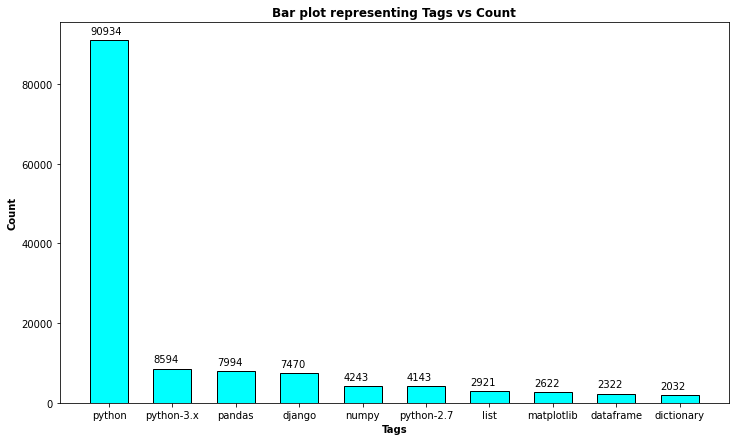

In [74]:
plt.figure(figsize = (12,7))
plt.bar(tag_array, count_array, width= 0.6, align='center',color='cyan', edgecolor = 'black')
i = 4500
j = 1500
# Annotating the bar plot with the values (total death count)
for i in range(len(tag_array)):
    plt.annotate(count_array[i], (-0.3 + i, count_array[i] + j))

plt.title("Bar plot representing Tags vs Count",fontweight="bold")
plt.xlabel('Tags',fontweight="bold")
plt.ylabel('Count',fontweight="bold")
plt.show()

## Word Cloud for Tags

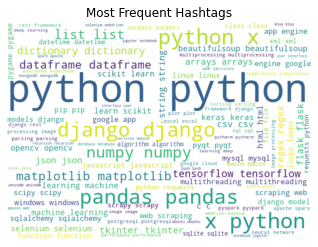

In [75]:
tags_list = ""
for tag, count in zip(tag_array_all, count_array_all):
    while count > 0:
        tags_list = tags_list + " " + tag
        count = count - 1
wordcloud = WordCloud(
    width=700, 
    height=500, 
    max_font_size=100,
    max_words=100,
    background_color='white').generate(tags_list)

plt.figure()
plt.title("Most Frequent Hashtags")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
lines = []
with open('./amul/Tags.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_tags = pd.DataFrame(lines)
df_tags.head()

Id     TagName    Count ExcerptPostId WikiPostId
0  1        .net   293379       3624959    3607476
1  2        html   970699       3673183    3673182
2  3  javascript  1955557       3624960    3607052
3  4         css   649436       3644670    3644669
4  5         php  1335050       3624936    3607050

In [65]:
lines = []
with open('./amul/Users.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_user = pd.DataFrame(lines)
df_user.head()

Id Reputation             CreationDate            DisplayName  \
0   1      58679  2008-07-31T14:22:31.287            Jeff Atwood   
1   4      31720  2008-07-31T14:22:31.317           Joel Spolsky   
2  13     194621  2008-08-01T04:18:04.943     Chris Jester-Young   
3  17      50531  2008-08-01T12:02:21.617           Nick Berardi   
4  25      31334  2008-08-01T12:15:23.243  CodingWithoutComments   

            LastAccessDate                         WebsiteUrl  \
0  2020-02-26T23:04:34.223  http://www.codinghorror.com/blog/   
1  2020-02-29T18:22:56.427        https://joelonsoftware.com/   
2  2019-12-03T01:13:11.627               http://about.cky.nz/   
3  2020-02-28T14:38:17.133             http://nickberardi.com   
4  2018-05-03T20:41:05.130                                      

                            Location  \
0                     El Cerrito, CA   
1                       New York, NY   
2                   Raleigh, NC, USA   
3                       Issaquah, WA   
4  Seattle, Washington United States   

                                             AboutMe   Views UpVotes  \
0  <p><a href="http://www.codinghorror.com/blog/a...  532726    3378   
1  <p>In 2000 I co-founded Fog Creek Software, wh...   77635     814   
2  <p>I use they/them to refer to myself in the t...   39977    5206   
3  <p>In my spare time when not working as a soft...    5155     885   
4            <p>a man, a plan, a canal, panama</p>\n    4246     539   

  DownVotes                                    ProfileImageUrl AccountId  
0      1311  https://www.gravatar.com/avatar/51d623f33f8b83...         1  
1        96      https://i.stack.imgur.com/C5gBG.jpg?s=128&g=1         4  
2       210      https://i.stack.imgur.com/1XtZi.jpg?s=128&g=1         9  
3       216                                                NaN        12  
4        83                                                NaN        18

In [66]:
lines = []
with open('./amul/Votes.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_votes = pd.DataFrame(lines)
df_votes.head()

Id PostId VoteTypeId             CreationDate UserId BountyAmount
0  2563    972          2  2008-08-04T00:00:00.000    NaN          NaN
1  5231   1857          2  2008-08-05T00:00:00.000    NaN          NaN
2  6355   2311          2  2008-08-05T00:00:00.000    NaN          NaN
3  7417   2277          1  2008-08-06T00:00:00.000    NaN          NaN
4  8519   3135          2  2008-08-06T00:00:00.000    NaN          NaN

In [67]:
lines = []
with open('./amul/Badges.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_badges = pd.DataFrame(lines)
df_badges.head()

Id UserId     Name                     Date Class TagBased
0  83033   5083  Teacher  2008-09-15T08:55:03.957     3    False
1  83298   2574  Teacher  2008-09-15T08:55:03.957     3    False
2  83395   4612  Teacher  2008-09-15T08:55:03.957     3    False
3  83460   3764  Teacher  2008-09-15T08:55:03.970     3    False
4  83534   1600  Teacher  2008-09-15T08:55:03.970     3    False

## A word cloud for Badges 

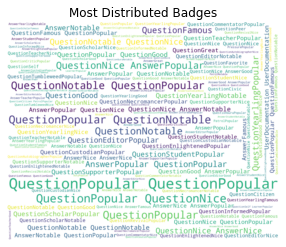

In [86]:
name_list = ""
for name in df_badges['Name']:
    name_list = name_list + name
wordcloud = WordCloud(
    width=2000, 
    height=1600, 
    max_font_size=400,
    max_words=150,
    background_color='white').generate(name_list)

plt.figure()
plt.title("Most Distributed Badges")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()